## Metode K-Means
#### a) Analisis Cluster dengan K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

1) panggil data set dan akan digunakan dengan mengubah terlebih dahulu menjadi sebuah data frame

In [2]:
faktorstress_data = pd.read_csv("C:/Users/hp/Downloads/StressLevel.csv")
faktorstress_data.tail(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1090,6,11,0,24,4,3,1,1,0,3,...,2,0,3,2,1,1,2,0,1,0
1091,19,11,1,25,4,3,1,5,5,1,...,2,1,4,2,4,1,5,5,5,2
1092,13,20,0,9,2,1,3,4,3,3,...,2,3,2,3,2,3,3,3,3,1
1093,1,30,0,4,1,2,5,2,1,3,...,5,5,1,4,1,3,1,1,1,0
1094,7,17,0,0,4,3,5,4,5,1,...,1,2,1,1,1,0,1,0,3,2
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


2) Lalu pilih variabel variabelnya untuk dikelompokkan

In [3]:
faktorstress_data = faktorstress_data[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
                              'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
                              'noise_level', 'living_conditions', 'safety', 'basic_needs',
                               'academic_performance', 'study_load', 'teacher_student_relationship', 
                               'future_career_concerns','social_support', 'peer_pressure', 
                               'extracurricular_activities', 'bullying','stress_level']]

3) lakukan pemeriksaan dengan melihat 5 baris di awal

In [4]:
faktorstress_data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


4) mengidentifikasi berapa banyaknya baris dan kolom pada data frame 

In [5]:
faktorstress_data.shape

(1100, 21)

ternyata terdapat 1100 baris dan 21 kolom 

5) periksa juga tipe dan jenis data dari variabel pengelompokannya

In [6]:
faktorstress_data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

terdapat 21 kolom dengan memiliki jenis data integer bertipe object

6) cek apakah terdapat missing value terdahap data frame tersebut. karena syarat metode K-Means yaitu tidak terdapat missing di dalam datanya.

In [7]:
faktorstress_data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

ternyata tidak memiliki missing data, karena pada outputnya bernilai 0 bahwa setiap variabelnya tidak terjadi missing value sehingga bisa melanjutkan ke tahap selanjutnya.

7) Mengtransformasi data

In [8]:
scaler = StandardScaler()
faktorstress_data_scaled = scaler.fit_transform(faktorstress_data)

melakukan standarisasi setiap variabel di data frame agar tidak ada variabel yagnn lebih mendominasi variabel lain.

8) Membuat model K-Means

In [9]:
kmeans = KMeans(n_clusters= 5, init='k-means++',random_state=1)
kmeans.fit(faktorstress_data_scaled)

KMeans(n_clusters=5, random_state=1)

output diatas dapat disimpulkan jika n_cluster menunjukkan jumlah cluster yang akan dibuat, dan random_state adalah nilai yang dapat menentukan reproduktifitas.

9) Visualisasi hasil Model K-Means

In [10]:
label = kmeans.fit_predict(faktorstress_data_scaled)
faktorstress_data_test = faktorstress_data.copy()
faktorstress_data_test['label'] = label
faktorstress_data_test['label'] = faktorstress_data_test['label'].astype(str)

<AxesSubplot:xlabel='anxiety_level', ylabel='self_esteem'>

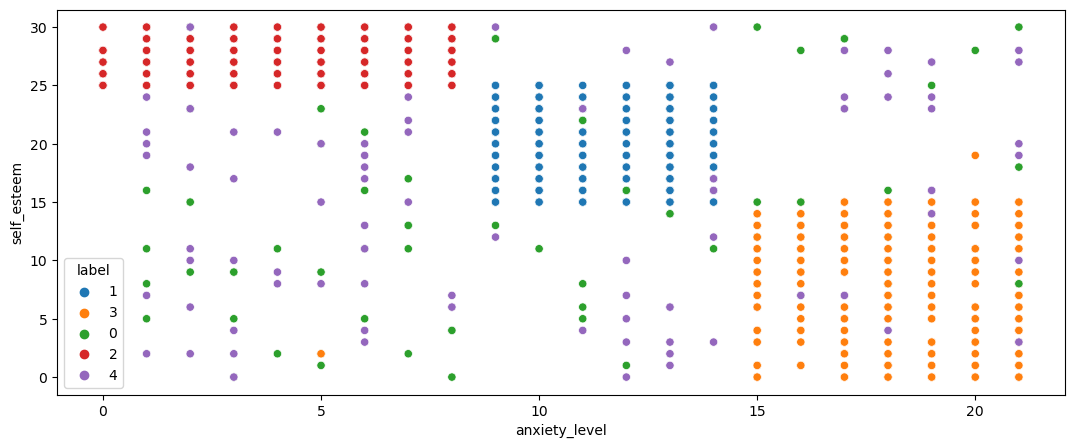

In [11]:
plt.figure(figsize= (13,5))
sns.scatterplot(x= faktorstress_data_test['anxiety_level'],
              y= faktorstress_data_test['self_esteem'],
              hue= faktorstress_data_test['label'])

hasil dari visualisasi scatter plot diatas menunjukkan jika terdapat perbedaan antar cluster yang dapat dilihat dengan penggunaan
warna berbeda per kluster. dengan memberikan gambaran tentang bagaimana titik data di setiap  cluster didistribusikan

#### b) Menentukan Jumlah Cluster Optimal

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

1) panggil data set dan akan digunakan dengan mengubah terlebih dahulu menjadi sebuah data frame*

In [13]:
faktorstress_data = pd.read_csv("C:/Users/hp/Downloads/StressLevel.csv")
faktorstress_data.tail(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1090,6,11,0,24,4,3,1,1,0,3,...,2,0,3,2,1,1,2,0,1,0
1091,19,11,1,25,4,3,1,5,5,1,...,2,1,4,2,4,1,5,5,5,2
1092,13,20,0,9,2,1,3,4,3,3,...,2,3,2,3,2,3,3,3,3,1
1093,1,30,0,4,1,2,5,2,1,3,...,5,5,1,4,1,3,1,1,1,0
1094,7,17,0,0,4,3,5,4,5,1,...,1,2,1,1,1,0,1,0,3,2
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


2) Lalu pilih variabel variabelnya untuk dikelompokkan

In [14]:
faktorstress_data = faktorstress_data[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
                              'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
                              'noise_level', 'living_conditions', 'safety', 'basic_needs',
                               'academic_performance', 'study_load', 'teacher_student_relationship', 
                               'future_career_concerns','social_support', 'peer_pressure', 
                               'extracurricular_activities', 'bullying','stress_level']]

3) lakukan pemeriksaan dengan melihat 5 baris di awal

In [15]:
faktorstress_data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


4) mengidentifikasi berapa banyaknya baris dan kolom pada data frame

In [16]:
faktorstress_data.shape

(1100, 21)

ternyata terdapat 1100 baris dan 21 kolom

5) periksa juga tipe dan jenis data dari variabel pengelompokannya

In [17]:
faktorstress_data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

terdapat 21 kolom dengan memiliki jenis data integer bertipe object

6) cek apakah terdapat missing value terdahap data frame tersebut. karena syarat metode K-Means yaitu tidak terdapat missing di dalam datanya.

In [18]:
faktorstress_data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Ternyata tidak memiliki missing data, karena pada outputnya bernilai 0 bahwa setiap variabelnya tidak terjadi missing value sehingga bisa melanjutkan ke tahap selanjutnya.

7) Mengtransformasi data

In [19]:
scaler = StandardScaler()
faktorstress_data_scaled = scaler.fit_transform(faktorstress_data)

melakukan standarisasi setiap variabel di data frame agar tidak ada variabel yagnn lebih mendominasi variabel lain.

8) Membuat model K-Means

In [20]:
kmeans = KMeans(n_clusters= 5, init='k-means++',random_state=1)
kmeans.fit(faktorstress_data_scaled)

KMeans(n_clusters=5, random_state=1)

output diatas dapat disimpulkan jika n_cluster menunjukkan jumlah cluster yang akan dibuat, dan random_state adalah nilai yang dapat menentukan reproduktifitas.

9) Buat kolom baru bernama 'label' sebagai tempat pengelompokan

In [21]:
label = kmeans.fit_predict(faktorstress_data_scaled)

10) periksa hasil output dari model K-Means metode 8

In [22]:
faktorstress_data_output = faktorstress_data.copy()
faktorstress_data_output['label'] = label
faktorstress_data_output['label'].value_counts()

3    306
1    300
2    300
4    116
0     78
Name: label, dtype: int64

Ternyata hasil dari output metode 8 menunjukkan bahwa anggota data yang masuk dalam cluster 3 sebanyak 306 data, cluster 1 sebanyak 300, cluster 2 sebanyak 300, cluster 4 sebanyak 116, dan 
cluster 0 sebanyak 78. Dapat disimpulkan jika anggota data pada cluster 3 = 306 merupakan anggota terbanayak dari pada cluster lainnya. Dengan anggota data pada cluster 0 merupakan anggota data yang memiliki anggota paling sedikit dari cluster lainnya.

11) Menentukan Jumlah cluster K yang ideal menggunakan metode Elbow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Text(0, 0.5, 'Inertia')

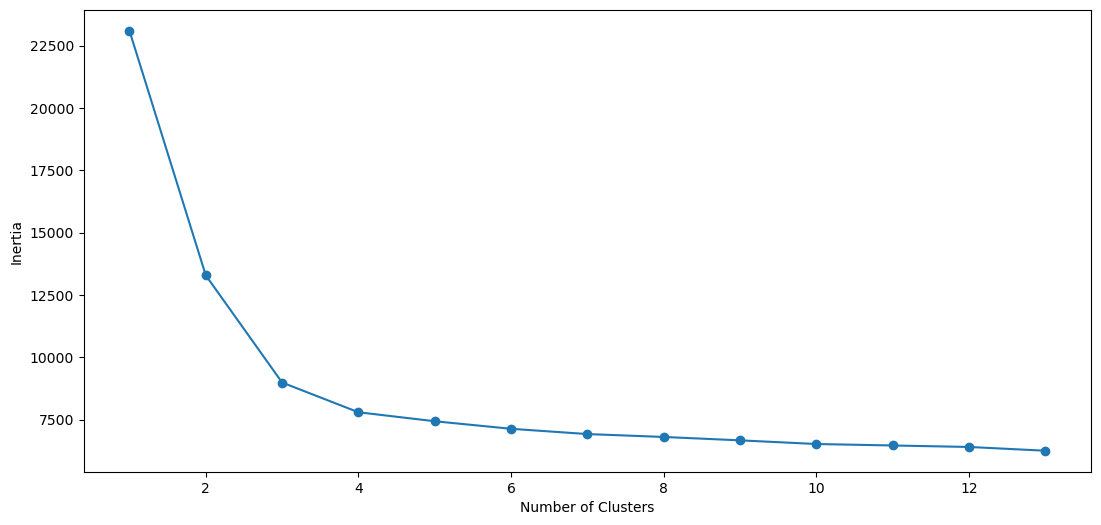

In [23]:
distance_values = []
for cluster in range(1,14):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(faktorstress_data_scaled)
    distance_values.append(kmeans.inertia_)
    
cluster_output = pd.DataFrame({'Cluster':range(1,14),
                              'distance_values':distance_values})

plt.figure(figsize=(13,6))

plt.plot(cluster_output['Cluster'],
        cluster_output['distance_values'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Dari visualisasi grafik tersebut dapat dilihat bahwa untuk nilai cluster optimum dapat dipilih antara cluster 3 sampe 8 karena di antara cluster tersebut terjadi penurunan yang signifikan menuju konstan

#### c) Membuat Profil Cluster KMeans

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

1) panggil data set dan akan digunakan dengan mengubah terlebih dahulu menjadi sebuah data frame

In [25]:
faktorstress_data = pd.read_csv("C:/Users/hp/Downloads/StressLevel.csv")
faktorstress_data.tail(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1090,6,11,0,24,4,3,1,1,0,3,...,2,0,3,2,1,1,2,0,1,0
1091,19,11,1,25,4,3,1,5,5,1,...,2,1,4,2,4,1,5,5,5,2
1092,13,20,0,9,2,1,3,4,3,3,...,2,3,2,3,2,3,3,3,3,1
1093,1,30,0,4,1,2,5,2,1,3,...,5,5,1,4,1,3,1,1,1,0
1094,7,17,0,0,4,3,5,4,5,1,...,1,2,1,1,1,0,1,0,3,2
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


2) Lalu pilih variabel variabelnya untuk dikelompokkan

In [26]:
faktorstress_data = faktorstress_data[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
                              'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
                              'noise_level', 'living_conditions', 'safety', 'basic_needs',
                               'academic_performance', 'study_load', 'teacher_student_relationship', 
                               'future_career_concerns','social_support', 'peer_pressure', 
                               'extracurricular_activities', 'bullying','stress_level']]

3) lakukan pemeriksaan dengan melihat 5 baris di awal

In [27]:
faktorstress_data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


4) mengidentifikasi berapa banyaknya baris dan kolom pada data frame

In [28]:
faktorstress_data.shape

(1100, 21)

ternyata terdapat 1100 baris dan 21 kolom

5) periksa juga tipe dan jenis data dari variabel pengelompokannya

In [29]:
faktorstress_data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

Ternyata semua kolomnya (21)  dengan memiliki jenis data integer bertipe object

6) cek apakah terdapat missing value terdahap data frame tersebut. karena syarat metode K-Means yaitu tidak terdapat missing di dalam datanya.

In [30]:
faktorstress_data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

ternyata tidak memiliki missing data, karena pada outputnya bernilai 0 bahwa setiap variabelnya tidak terjadi missing value sehingga bisa melanjutkan ke tahap selanjutnya.

7) Mengtransformasi data

In [31]:
scaler = StandardScaler()
faktorstress_data_scaled = scaler.fit_transform(faktorstress_data)

Dengan melakukan standarisasi setiap variabel di data frame agar tidak ada variabel yagnn lebih mendominasi variabel lain.

8) Membuat model K-Means

In [32]:
kmeans = KMeans(n_clusters= 5, init='k-means++',random_state=1)
kmeans.fit(faktorstress_data_scaled)

KMeans(n_clusters=5, random_state=1)

9) Buat kolom baru bernama 'label' sebagai tempat pengelompokan

In [33]:
label = kmeans.fit_predict(faktorstress_data_scaled)

10) periksa hasil output dari model K-Means metode 

In [34]:
faktorstress_data_output = faktorstress_data.copy()
faktorstress_data_output['label'] = label
faktorstress_data_output['label'].value_counts()

3    306
1    300
2    300
4    116
0     78
Name: label, dtype: int64

Ternyata hasil dari output metode 8 menunjukkan bahwa anggota data yang masuk dalam cluster 3 sebanyak 306 data, cluster 1 sebanyak 300, cluster 2 sebanyak 300, cluster 4 sebanyak 116, dan cluster 0 sebanyak 78. Dapat disimpulkan jika anggota data pada cluster 3 = 306 merupakan anggota terbanayak dari pada cluster lainnya. Dengan anggota data pada cluster 0 merupakan anggota data yang memiliki anggota paling sedikit dari cluster lainnya.

11) Menentukan seluruh rata-rata variabel  agar menjadi profit cluster yang terbentuk dengan membuat kolom baru = cols

In [35]:
cols = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
        'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',    
        'noise_level', 'living_conditions', 'safety', 'basic_needs',
        'academic_performance', 'study_load', 'teacher_student_relationship', 
        'future_career_concerns','social_support', 'peer_pressure', 
        'extracurricular_activities', 'bullying','stress_level']

lalu rata ratakan keseluruhan masing masingvariabelnya

In [36]:
overall_mean = faktorstress_data_output[cols].apply(np.mean).T
overall_mean = pd.DataFrame(overall_mean,columns =['overall_range'])
overall_mean

,overall_range
anxiety_level,11.063636
self_esteem,17.777273
mental_health_history,0.492727
depression,12.555455
headache,2.508182
blood_pressure,2.181818
sleep_quality,2.660000
breathing_problem,2.753636
noise_level,2.649091
living_conditions,2.518182


Menghasilkan output seperti diatas dengan berdasar pada perhitungan rata rata bisa dilihat bahwa variabel self esteem menjadi variabel dengan rata rata tertinggi yabg artinya variabel ini merupakan variabel yang berpengaruh tinggi dalam penyebab stress. Sedangkan variabel mental health history menjadi variabel ber rata rata terkecil yang berarti riwayat kesehatan mental tidak berpengaruh besar pada sress level

12) menentukan keseluruhan rata-rata per cluster dari masing masing variabelnya agaar melakukan profit cluster yang telah terbentuk

In [37]:
cluster_mean = faktorstress_data_output.groupby('label')[cols].mean().T
cluster_mean

label,0,1,2,3,4
anxiety_level,10.243590,11.410000,4.190000,18.013072,10.163793
self_esteem,14.474359,19.980000,27.430000,7.767974,15.741379
mental_health_history,0.525641,0.513333,0.000000,1.000000,0.353448
depression,13.576923,11.640000,4.096667,21.343137,12.931034
headache,3.397436,2.483333,1.000000,3.931373,2.120690
blood_pressure,3.000000,1.000000,2.000000,3.000000,3.000000
sleep_quality,3.166667,2.456667,4.486667,1.013072,2.465517
breathing_problem,1.974359,3.026667,1.513333,3.944444,2.637931
noise_level,2.551282,2.523333,1.470000,4.006536,2.508621
living_conditions,1.064103,2.483333,3.526667,1.526144,3.594828


In [38]:
pd.concat([cluster_mean,overall_mean], axis=1)

,0,1,2,3,4,overall_range
anxiety_level,10.243590,11.410000,4.190000,18.013072,10.163793,11.063636
self_esteem,14.474359,19.980000,27.430000,7.767974,15.741379,17.777273
mental_health_history,0.525641,0.513333,0.000000,1.000000,0.353448,0.492727
depression,13.576923,11.640000,4.096667,21.343137,12.931034,12.555455
headache,3.397436,2.483333,1.000000,3.931373,2.120690,2.508182
blood_pressure,3.000000,1.000000,2.000000,3.000000,3.000000,2.181818
sleep_quality,3.166667,2.456667,4.486667,1.013072,2.465517,2.660000
breathing_problem,1.974359,3.026667,1.513333,3.944444,2.637931,2.753636
noise_level,2.551282,2.523333,1.470000,4.006536,2.508621,2.649091
living_conditions,1.064103,2.483333,3.526667,1.526144,3.594828,2.518182


Pada hasil diatas dengan mencari mean setiap variabel pada semua cluster dengan menggunakan metode grub, dan digabungkan antara rata-rata 
keseluruhan dengan per cluster menggunakan metode 
concat. Hasil penggabungan tersebut yang kemudian 
akan memberi gambaran tentang persamaan dan 
perbedaan antar cluster. 